In [1]:
from performance_figure_functions import *
from predictor_comparisons import *

comp_datasets, comp_holdout, comp_holdout_two = get_all_baseline_sets()
avgpr_baselines_holdout, overall_baseline_avgpr, all_binned_baseline = get_holdout_padj_baselines()
af_baselines = get_af_metrics_baselines_train_test()
af_baselines['dataset'] = af_baselines['dataset'] + '_' + af_baselines['mode'] + '_' + af_baselines['r2_cutoff']

comp_datasets['r2_cutoff'] = 'comp'
comp_datasets['r2_cutoff'] = 'comp'
all_baselines = comp_datasets.append(af_baselines)
all_baselines[(all_baselines['mode'] == 'all') & ((all_baselines.r2_cutoff == 'iptm') | (all_baselines.dataset.str.contains('z')))]

all_baselines = all_baselines.sort_values('dataset')

list_ncips = []
for i in range(1,13,2):
    list_ncips.append(['P' + str(i), 'P' + str(i+1)])

af_holdout_baselines =get_holdout_baseline_performances('ncip', list_ncips)

[[ 19.47831  -70.77352  -21.16255  -13.871626 -20.07787  -13.528235
  -11.048046 -20.07787   -3.540857 -36.79709   -2.456175 -40.523144]
 [-70.77352  -18.93514  -26.403393 -32.53065  -33.440853 -34.852646
  -32.857758 -26.403389 -43.929817 -22.041687 -43.34672  -20.957006]
 [-21.16255  -26.403393 -37.096886 -56.090908 -35.485447 -26.975592
  -19.874924 -28.904749 -22.381483 -31.125652 -26.410875 -54.92464 ]
 [-13.871626 -32.53065  -56.090908 -37.943962 -28.105022 -35.767807
  -29.469463 -20.43964  -25.122353 -29.231853 -53.23049  -30.843292]
 [-20.07787  -33.440853 -35.485447 -28.105022 -25.530361 -64.245476
  -33.590576 -45.56511  -35.440697 -41.093914 -33.961185 -30.598894]
 [-13.528235 -34.852646 -26.975592 -35.767807 -64.245476 -24.118572
  -40.691242 -33.02586  -32.831753 -38.54664  -22.336733 -41.376274]
 [-11.048046 -32.857758 -19.874924 -29.469463 -33.590576 -40.691242
  -37.096886 -55.52619  -23.992922 -38.847374 -23.992922 -38.847374]
 [-20.07787  -26.403389 -28.904749 -20.43

In [2]:
holdout_combo_baselines = pd.concat([comp_holdout, af_holdout_baselines])
holdout_combo_baselines = holdout_combo_baselines[~(holdout_combo_baselines.dataset.isin(['z1', 'z2', 'z3']))]

In [3]:
iptm_baselines = all_baselines[(all_baselines['mode'] == 'test') & ((all_baselines['r2_cutoff'] == 'iptm') | (all_baselines['dataset'] == 'z4_test'))]

In [4]:
#plot performance regression 
#r2
#spearman 
def plot_df_regression_padj_final(df, savename, w =4, h =2, row_1 = 'test_r2', row_2 = 'test_spearman' ):#, c_scheme = 'copper'):
    fig, ax = plt.subplots(2,1, sharex= True) #plot AUCROC, MCC, n_features
    # the size of A4 paper
    fig.set_size_inches(w,h)
    
    plt.xlabel('')
    #plotting baseline AUCROC for imbalanced class +
    s =sns.barplot(data = df,
                x = 'dataset', 
                y = row_1, ax = ax[0],)
    #s._legend.remove()
    ax[0].set_ylim(0,1)
    plt.legend([],[], frameon=False)
    plt.xlabel('')
    s = sns.barplot(data = df,
                x = 'dataset', 
                y = row_2, ax = ax[1],)# colormap=c_scheme)
    #s._legend.remove()
    ax[1].set_ylim(0,1)
    
    plt.xticks(rotation=90)
    plt.legend([],[], frameon=False)
    plt.xlabel('')
    for i in range(0,2):
        ax[i].legend([],[], frameon=False)
        ax[i].set_xlabel('')

    plt.savefig(savename, dpi = 300)
    plt.show()
    

def plot_df_classification_padj_final(df, savename, w =4, h =2 , auc_row  = 'rocauc_test', avgpr_row = 'avgpr_test'):
    fig, ax = plt.subplots(2,1, sharex= True) #plot AUCROC, MCC, n_features
    # the size of A4 paper
    fig.set_size_inches(w,h)
    
    plt.xlabel('')
    #plotting baseline AUCROC for imbalanced class +
    s =sns.barplot(data = df,
                x = 'dataset', 
                y = auc_row, ax = ax[0])
    #s._legend.remove()
    ax[0].set_ylim(0,1)
    ax[0].axhline(0.5)
    s = sns.barplot(data = df,
                x = 'dataset', 
                y = avgpr_row, ax = ax[1])
    #s._legend.remove()
    ax[1].set_ylim(0,1)
    ax[1].axhline(overall_baseline_avgpr)
    plt.xticks(rotation=90)
    for i in range(0,2):
        ax[i].legend([],[], frameon=False)
        ax[i].set_xlabel('')

    plt.savefig(savename, dpi = 300)
    plt.show()

    
def plot_df_regression_padj_main_fig(df, savename, w =4, h =2 ):#, c_scheme = 'copper'):
    fig, ax = plt.subplots()#(2,1, sharex= True) #plot AUCROC, MCC, n_features
    # the size of A4 paper
    fig.set_size_inches(w,h)
    
    plt.xlabel('')
    #plotting baseline AUCROC for imbalanced class +
    s =sns.barplot(data = df,
                x = 'dataset', 
                y = 'test_spearman', )
    #s._legend.remove()
    ax.set_ylim(0,1)
    plt.legend([],[], frameon=False)
    plt.xlabel('')
    
    plt.xticks(rotation=90)
    plt.legend([],[], frameon=False)
    plt.xlabel('')
    
    plt.savefig(savename, dpi = 300)
    plt.show()
    

def plot_df_classification_padj_main_fig(df, savename, w =4, h =2 ):
    fig, ax = plt.subplots()#(2,1, sharex= True) #plot AUCROC, MCC, n_features
    # the size of A4 paper
    fig.set_size_inches(w,h)
    
    plt.xlabel('')
    #plotting baseline AUCROC for imbalanced class +
    s =sns.barplot(data = df,
                x = 'dataset', 
                y = 'avgpr_test')
    #s._legend.remove()
    ax.set_ylim(0,1)
    ax.axhline(overall_baseline_avgpr)
    plt.xticks(rotation=90)
    plt.savefig(savename, dpi = 300)
    plt.show()

    #plot performance regression 
#r2
#spearman 
def plot_df_regression_heldout_final(df, savename, w =4, h =2, row_1 = 'test_r2', row_2 = 'test_spearman', line_1 = None, line_2 = None ):#, c_scheme = 'copper'):
    fig, ax = plt.subplots(2,1, sharex= True) #plot AUCROC, MCC, n_features
    # the size of A4 paper
    fig.set_size_inches(w,h)
    
    plt.xlabel('')
    #plotting baseline AUCROC for imbalanced class +
    s =sns.boxplot(data = df,
                x = 'dataset', 
                y = row_1, ax = ax[0],showfliers=False)
    s =sns.stripplot(data = df,
                x = 'dataset', 
                y = row_1, s= 2, color = 'black', ax = ax[0],clip_on=False )
    #s._legend.remove()
    ax[0].set_ylim(0,1)
    if line_1:
        ax[0].axhline(line_1, ls = '--', color = 'gray', alpha = 0.75)
    plt.legend([],[], frameon=False)
    plt.xlabel('')
    s = sns.boxplot(data = df,
                x = 'dataset', 
                y = row_2, ax = ax[1],showfliers=False)# colormap=c_scheme)
    s =sns.stripplot(data = df,
                x = 'dataset', 
                y = row_2, s= 2, color = 'black', ax = ax[1],clip_on=False )   
    ax[1].axhline(line_2, ls = '--', color = 'gray', alpha = 0.75)
    
    ax[1].set_ylim(-0.75,1)
    plt.xticks(rotation=90)
    plt.legend([],[], frameon=False)
    plt.xlabel('')
    for i in range(0,2):
        ax[i].legend([],[], frameon=False)
        ax[i].set_xlabel('')

    plt.savefig(savename, dpi = 300)
    plt.show()
    

def plot_df_classification_heldout_final(df, savename, w =4, h =2,auc_row  = 'rocauc_test', avgpr_row = 'avgpr_test', line_1 = None, line_2 = None ):
    fig, ax = plt.subplots(2,1, sharex= True) #plot AUCROC, MCC, n_features
    # the size of A4 paper
    fig.set_size_inches(w,h)
    
    plt.xlabel('')
    #plotting baseline AUCROC for imbalanced class +
    s =sns.boxplot(data = df,
                x = 'dataset', 
                y = auc_row, ax = ax[0],showfliers=False)
    s =sns.stripplot(data = df,
                x = 'dataset', 
                y = auc_row, s= 2, color = 'black', ax = ax[0], clip_on=False )
    #s._legend.remove()
    ax[0].set_ylim(0,1)
    #ax[0].axhline(0.5)
    if line_1:
        ax[0].axhline(line_1, ls = '--', color = 'gray', alpha = 0.75)
    s = sns.boxplot(data = df,
                x = 'dataset', 
                y = avgpr_row, ax = ax[1],showfliers=False)
    s =sns.stripplot(data = df,
                x = 'dataset', 
                y = avgpr_row, s= 2, color = 'black', ax = ax[1],clip_on=False )
    if line_2:
        ax[1].axhline(line_2, ls = '--', color = 'gray', alpha = 0.75)
    #s._legend.remove()
    ax[1].set_ylim(0,1)
    # for apb in avgpr_baselines_holdout:
    #     ax[1].axhline(apb)
    plt.xticks(rotation=90)
    for i in range(0,2):
        ax[i].legend([],[], frameon=False)
        ax[i].set_xlabel('')

    plt.savefig(savename, dpi = 300)
    plt.show()

def plot_df_regression_heldout_main_fig(df, savename, w =4, h =2, baseline = None):#, c_scheme = 'copper'):
    fig, ax = plt.subplots() #plot AUCROC, MCC, n_features
    # the size of A4 paper
    fig.set_size_inches(w,h)
    
    plt.xlabel('')
    #plotting baseline AUCROC for imbalanced class +
    s =sns.boxplot(data = df,
                x = 'dataset', 
                y = 'test_spearman', showfliers=False)
    s =sns.stripplot(data = df,
                x = 'dataset', 
                y = 'test_spearman', s= 2, color = 'black' ,clip_on=False )
    #s._legend.remove()
    if baseline:
        ax.axhline(baseline, ls = '--', color = 'gray')
    ax.set_ylim(-0.1,1)
    plt.legend([],[], frameon=False)
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.savefig(savename, dpi = 300)
    plt.show()
    

def plot_df_classification_heldout_main_fig(df, savename, w =4, h =2,baseline = None ):
    fig, ax = plt.subplots() #plot AUCROC, MCC, n_features
    # the size of A4 paper
    fig.set_size_inches(w,h)
    
    plt.xlabel('')
    #plotting baseline AUCROC for imbalanced class +
    s =sns.boxplot(data = df,
                x = 'dataset', 
                y = 'avgpr_test',showfliers=False)
    s =sns.stripplot(data = df,
                x = 'dataset', 
                y = 'avgpr_test', s= 2, color = 'black',clip_on=False )
    #s._legend.remove()
    if baseline:
        ax.axhline(baseline, ls = '--', color = 'gray')
    ax.set_ylim(0,1)
    for apb in avgpr_baselines_holdout:
        ax.axhline(apb)
    plt.xticks(rotation=90)
    
    plt.savefig(savename, dpi = 300)
    plt.show()

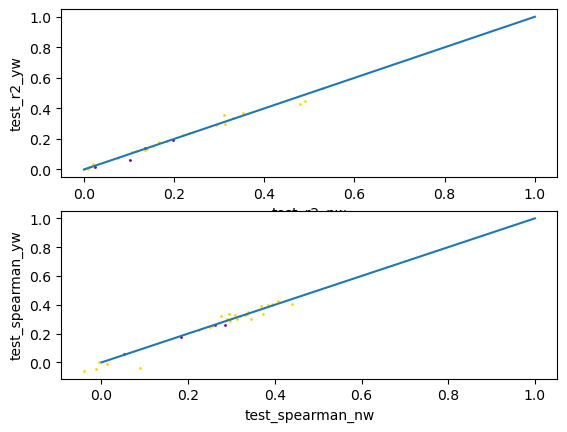

In [5]:


padj_regression_results_nw = pd.read_csv('07_23_ncip_regression_default_small.csv')
padj_regression_results_nw['total_dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_yw = pd.read_csv('07_23_ncip_regression_weights_small.csv')
both_result_reg = padj_regression_results_nw.merge(padj_regression_results_yw, on = ['dataset', 'r2_cutoff'], suffixes = ['_nw', '_yw'])

fig, axes = plt.subplots(2, sharex = False)
sns.scatterplot(data = both_result_reg[both_result_reg.r2_cutoff != 'af'], x = 'test_r2_nw', y = 'test_r2_yw', color ='gold', ax = axes[0],s = 5 )
sns.scatterplot(data = both_result_reg[both_result_reg.r2_cutoff == 'af'], x = 'test_r2_nw', y = 'test_r2_yw',  color = 'purple', ax = axes[0],s = 5 )
sns.scatterplot(data = both_result_reg[both_result_reg.r2_cutoff != 'af'], x = 'test_spearman_nw', y = 'test_spearman_yw', color ='gold', ax = axes[1],s = 5 )
sns.scatterplot(data = both_result_reg[both_result_reg.r2_cutoff == 'af'], x = 'test_spearman_nw', y = 'test_spearman_yw',  color = 'purple', ax = axes[1],s = 5 )
axes[0].plot([0,1],[0,1])
axes[1].plot([0,1],[0,1])
plt.show()



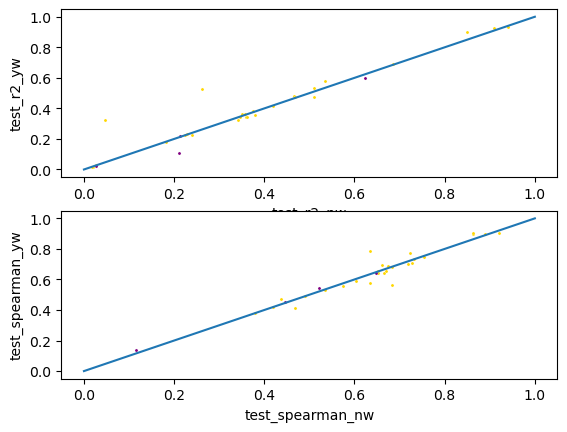

In [6]:


padj_regression_results_nw = pd.read_csv('07_23_ncip_regression_default.csv')
padj_regression_results_nw['total_dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_yw = pd.read_csv('07_23_ncip_regression_weights.csv')
both_result_reg = padj_regression_results_nw.merge(padj_regression_results_yw, on = ['dataset', 'r2_cutoff'], suffixes = ['_nw', '_yw'])

fig, axes = plt.subplots(2, sharex = False)
sns.scatterplot(data = both_result_reg[both_result_reg.r2_cutoff != 'af'], x = 'test_r2_nw', y = 'test_r2_yw', color ='gold', ax = axes[0],s = 5 )
sns.scatterplot(data = both_result_reg[both_result_reg.r2_cutoff == 'af'], x = 'test_r2_nw', y = 'test_r2_yw',  color = 'purple', ax = axes[0],s = 5 )
sns.scatterplot(data = both_result_reg[both_result_reg.r2_cutoff != 'af'], x = 'test_spearman_nw', y = 'test_spearman_yw', color ='gold', ax = axes[1],s = 5 )
sns.scatterplot(data = both_result_reg[both_result_reg.r2_cutoff == 'af'], x = 'test_spearman_nw', y = 'test_spearman_yw',  color = 'purple', ax = axes[1],s = 5 )
axes[0].plot([0,1],[0,1])
axes[1].plot([0,1],[0,1])
plt.show()



In [7]:
padj_regression_results_nw['dataset2'] = padj_regression_results_nw['dataset']
padj_regression_results_nw['dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw = padj_regression_results_nw.sort_values('dataset')


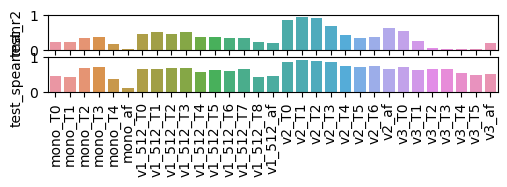

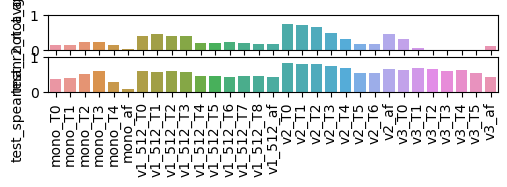

In [8]:
padj_regression_results_nw = pd.read_csv('07_23_ncip_regression_default.csv')
padj_regression_results_nw['total_dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw['dataset2'] = padj_regression_results_nw['dataset']
padj_regression_results_nw['dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw = padj_regression_results_nw.sort_values('dataset')
plot_df_regression_padj_final(padj_regression_results_nw, 'ncip_reg_avgd.svg',5.8,1)
#plot_df_regression_padj_final(df, savename, w =4, h =2, row_1 = 'test_r2', row_2 = 'test_spearman' )
plot_df_regression_padj_final(padj_regression_results_nw, 'ncip_reg_not_avgd.svg',5.8,1, row_1= 'test_r2_not_avgd', row_2 = 'test_spearman_not_avgd')
padj_regression_results_nw['dataset'] = padj_regression_results_nw.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)

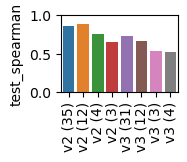

In [9]:
#paper figure 
keep_models_list = ['T0',  'T2',  'T4', 'af']
versions = ['v2', 'v3']
subset = padj_regression_results_nw[(padj_regression_results_nw.r2_cutoff.isin(keep_models_list)) & (padj_regression_results_nw.dataset2.isin(versions))]
#subset['dataset'] = subset.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)
plot_df_regression_padj_main_fig(subset, 'regression_main_fig.svg',1.5,1)

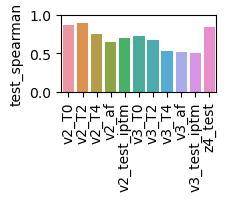

In [10]:
padj_regression_results_nw = pd.read_csv('07_23_ncip_regression_default.csv')
padj_regression_results_nw['total_dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw['dataset2'] = padj_regression_results_nw['dataset']
padj_regression_results_nw['dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
subset = padj_regression_results_nw[(padj_regression_results_nw.r2_cutoff.isin(keep_models_list)) & (padj_regression_results_nw.dataset2.isin(versions))]
with_comps = pd.concat([subset, iptm_baselines.iloc[1:]])
with_comps = with_comps.sort_values('dataset')

#with_comps = pd.concat([subset, iptm_baselines.iloc[1:]])
#with_comps = with_comps.sort_values('dataset')
plot_df_regression_padj_main_fig(with_comps, 'regression_main_fig.svg',2,1)


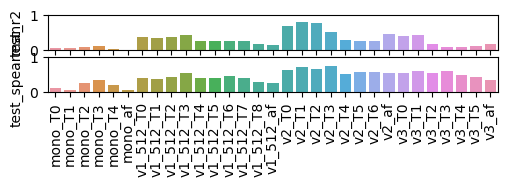

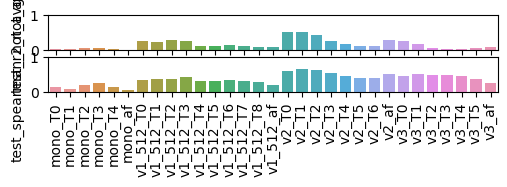

In [11]:
padj_regression_results_nw = pd.read_csv('07_23_ncip_regression_default_small_23.csv')
padj_regression_results_nw['total_dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw['dataset2'] = padj_regression_results_nw['dataset']
padj_regression_results_nw['dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw = padj_regression_results_nw.sort_values('dataset')
plot_df_regression_padj_final(padj_regression_results_nw, 'ncip_reg_avgd_23.svg',5.8,1)
#plot_df_regression_padj_final(df, savename, w =4, h =2, row_1 = 'test_r2', row_2 = 'test_spearman' )
plot_df_regression_padj_final(padj_regression_results_nw, 'ncip_reg_not_avgd_23.svg',5.8,1, row_1= 'test_r2_not_avgd', row_2 = 'test_spearman_not_avgd')
padj_regression_results_nw['dataset'] = padj_regression_results_nw.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)

In [12]:
test_23_max_pr = padj_regression_results_nw.test_r2.max()
test_23_max_sr = padj_regression_results_nw.test_spearman.max()

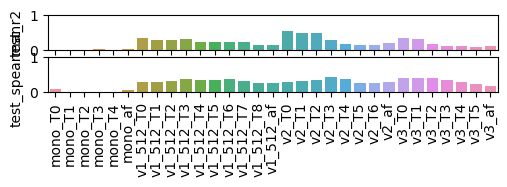

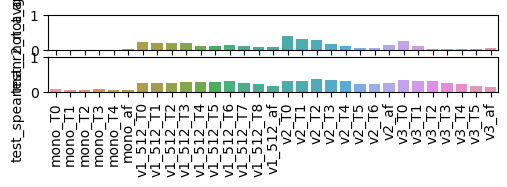

In [13]:
padj_regression_results_nw = pd.read_csv('07_23_ncip_regression_default_small.csv')
padj_regression_results_nw['total_dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw['dataset2'] = padj_regression_results_nw['dataset']
padj_regression_results_nw['dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw = padj_regression_results_nw.sort_values('dataset')
plot_df_regression_padj_final(padj_regression_results_nw, 'ncip_reg_avgd_44.svg',5.8,1)
#plot_df_regression_padj_final(df, savename, w =4, h =2, row_1 = 'test_r2', row_2 = 'test_spearman' )
plot_df_regression_padj_final(padj_regression_results_nw, 'ncip_reg_not_avgd_44.svg',5.8,1, row_1= 'test_r2_not_avgd', row_2 = 'test_spearman_not_avgd')
padj_regression_results_nw['dataset'] = padj_regression_results_nw.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)

In [14]:
test_44_max_pr = padj_regression_results_nw.test_r2.max()
test_44_max_sr = padj_regression_results_nw.test_spearman.max()

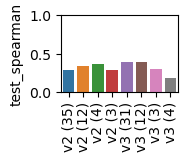

In [15]:
#paper figure 
keep_models_list = ['T0',  'T2',  'T4', 'af']
versions = ['v2', 'v3']
subset = padj_regression_results_nw[(padj_regression_results_nw.r2_cutoff.isin(keep_models_list)) & (padj_regression_results_nw.dataset2.isin(versions))]
#subset['dataset'] = subset.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)
plot_df_regression_padj_main_fig(subset, 'regression_main_fig.svg',1.5,1)

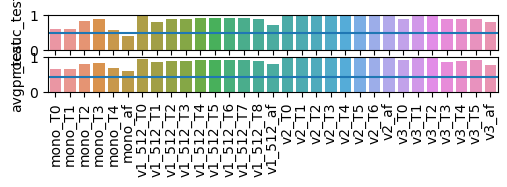

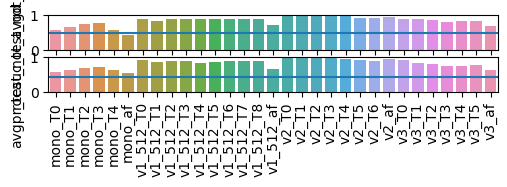

In [16]:
padj_classification_results_nw = pd.read_csv('07_23_ncip_classification_default.csv')
padj_classification_results_nw['total_dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw['dataset2'] = padj_classification_results_nw['dataset']
padj_classification_results_nw['dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw = padj_classification_results_nw.sort_values('dataset')
plot_df_classification_padj_final(padj_classification_results_nw, 'classification_nw_all.svg',5.8,1)
plot_df_classification_padj_final(padj_classification_results_nw, 'classification_nw_all_not_avgd.svg',5.8,1, auc_row = 'rocauc_test_not_avgd', avgpr_row= 'avgpr_test_not_avgd')

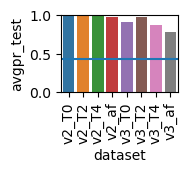

In [17]:
#paper figure 
keep_models_list = ['T0',  'T2',  'T4', 'af']
versions = ['v2', 'v3']
subset = padj_classification_results_nw[(padj_classification_results_nw.r2_cutoff.isin(keep_models_list)) & (padj_classification_results_nw.dataset2.isin(versions))]
#subset['dataset'] = subset.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)
plot_df_classification_padj_main_fig(subset, 'classification_main_fig.svg',1.5,1)

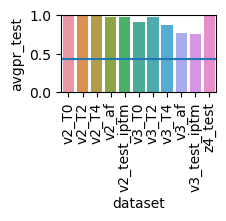

In [18]:
padj_regression_results_nw = pd.read_csv('07_23_ncip_classification_default.csv')
padj_regression_results_nw['total_dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw['dataset2'] = padj_regression_results_nw['dataset']
padj_regression_results_nw['dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
subset = padj_regression_results_nw[(padj_regression_results_nw.r2_cutoff.isin(keep_models_list)) & (padj_regression_results_nw.dataset2.isin(versions))]
iptm_baselines = iptm_baselines.rename(columns = {'test_AUCROC': 'rocauc_test', 'test_avgpr':'avgpr_test' })
with_comps = pd.concat([subset, iptm_baselines.iloc[1:]])
with_comps = with_comps.sort_values('dataset')
plot_df_classification_padj_main_fig(with_comps, 'classification_main_fig.svg',2,1)


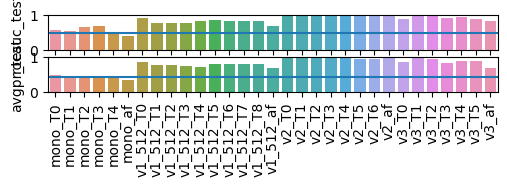

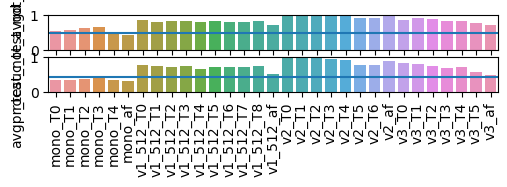

In [19]:
padj_classification_results_nw = pd.read_csv('07_23_ncip_classification_default_small_23.csv')
padj_classification_results_nw['total_dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw['dataset2'] = padj_classification_results_nw['dataset']
padj_classification_results_nw['dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw = padj_classification_results_nw.sort_values('dataset')
plot_df_classification_padj_final(padj_classification_results_nw, 'classification_nw_all_23.svg',5.8,1)
plot_df_classification_padj_final(padj_classification_results_nw, 'classification_nw_all_23_not_avgd.svg',5.8,1, auc_row = 'rocauc_test_not_avgd', avgpr_row= 'avgpr_test_not_avgd')

In [20]:
test_23_max_aucroc = padj_classification_results_nw.rocauc_test.max()
test_23_max_avgpr = padj_classification_results_nw.avgpr_test.max()

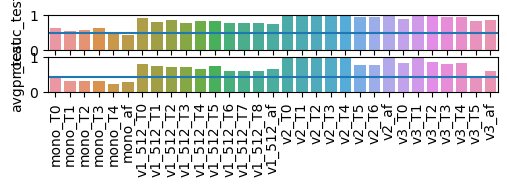

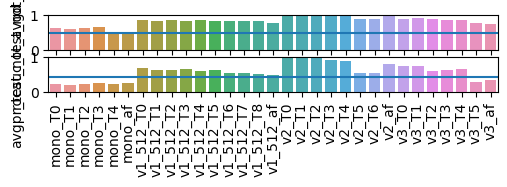

In [21]:
padj_classification_results_nw = pd.read_csv('07_23_ncip_classification_default_small.csv')
padj_classification_results_nw['total_dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw['dataset2'] = padj_classification_results_nw['dataset']
padj_classification_results_nw['dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw = padj_classification_results_nw.sort_values('dataset')
plot_df_classification_padj_final(padj_classification_results_nw, 'classification_nw_all_44.svg',5.8,1)
plot_df_classification_padj_final(padj_classification_results_nw, 'classification_nw_all_44_not_avgd.svg',5.8,1, auc_row = 'rocauc_test_not_avgd', avgpr_row= 'avgpr_test_not_avgd')

In [22]:
test_44_max_aucroc = padj_classification_results_nw.rocauc_test.max()
test_44_max_avgpr = padj_classification_results_nw.avgpr_test.max()

In [23]:
padj_classification_results_nw = pd.read_csv('07_23_ncip_classification_hold_2_default.csv')
padj_classification_results_nw['total_dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw['dataset2'] = padj_classification_results_nw['dataset']
holdout_combo_baselines = holdout_combo_baselines.rename(columns = {'test_AUCROC': 'rocauc_test', 'test_avgpr':'avgpr_test' })
padj_classification_results_nw['dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw = pd.concat([padj_classification_results_nw, holdout_combo_baselines])
padj_classification_results_nw = padj_classification_results_nw.sort_values('dataset')


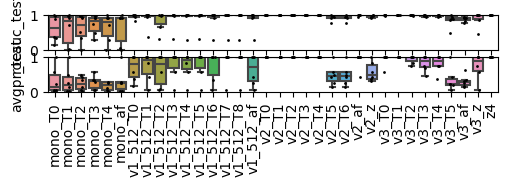

In [24]:

plot_df_classification_heldout_final(padj_classification_results_nw, 'classification_nw_2_ho.svg',5.8,1, 'rocauc_test', 'avgpr_test', test_44_max_aucroc, test_44_max_avgpr)



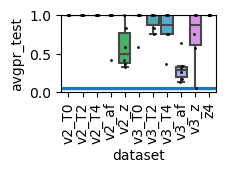

In [25]:
#paper figure 
keep_models_list = ['T0',  'T2',  'T4', 'af']
versions = ['v2', 'v3']
subset = padj_classification_results_nw[((padj_classification_results_nw.r2_cutoff.isin(keep_models_list)) & (padj_classification_results_nw.dataset2.isin(versions))) | (padj_classification_results_nw.l2_penalty.isna())]
#subset['dataset'] = subset.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)
plot_df_classification_heldout_main_fig(subset, 'classification_holdout_main_fig.svg',2,1,test_44_max_avgpr)

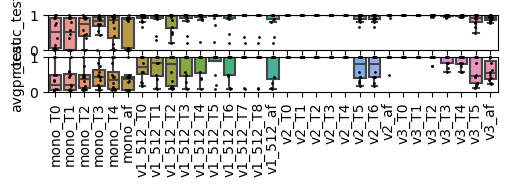

In [26]:
#held out test set results 
#AML

#Making main padj figures (all datasets, cutoffs, showing effects of training weights)
padj_classification_results_nw = pd.read_csv('07_23_ncip_classification_hold_1_default.csv')
padj_classification_results_nw['total_dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw['dataset2'] = padj_classification_results_nw['dataset']
padj_classification_results_nw['dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw = padj_classification_results_nw.sort_values('dataset')
plot_df_classification_heldout_final(padj_classification_results_nw, 'classification_nw_1_ho.svg',5.8,1, 'rocauc_test', 'avgpr_test', test_23_max_aucroc, test_23_max_avgpr)




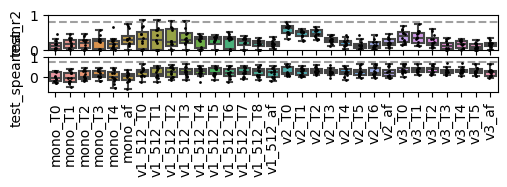

In [27]:
padj_regression_results_nw = pd.read_csv('07_23_ncip_regression_hold_1_default.csv')
padj_regression_results_nw['total_dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw['dataset2'] = padj_regression_results_nw['dataset']
padj_regression_results_nw['dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw = padj_regression_results_nw.sort_values('dataset')
plot_df_regression_heldout_final(padj_regression_results_nw, 'regression_nw_1_ho.svg',5.8,1, 'test_r2', 'test_spearman', test_23_max_pr, test_23_max_sr)


In [28]:
test_23_max_pr

0.8023714552232697

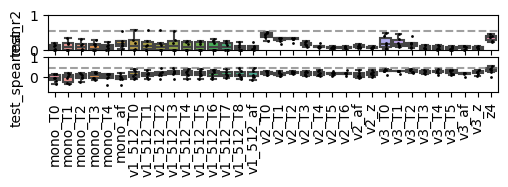

In [29]:
padj_regression_results_nw = pd.read_csv('07_23_ncip_regression_hold_2_default.csv')
padj_regression_results_nw['total_dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw['dataset2'] = padj_regression_results_nw['dataset']
padj_regression_results_nw['dataset'] = padj_regression_results_nw['dataset'] + '_' + padj_regression_results_nw['r2_cutoff']
padj_regression_results_nw = padj_regression_results_nw.sort_values('dataset')
padj_regression_results_nw = pd.concat([padj_regression_results_nw, holdout_combo_baselines])
padj_regression_results_nw = padj_regression_results_nw.sort_values('dataset')
plot_df_regression_heldout_final(padj_regression_results_nw, 'regression_nw_2_ho.svg',5.8,1,'test_r2', 'test_spearman', test_44_max_pr, test_44_max_sr)

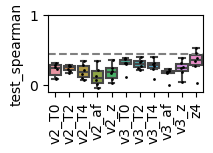

In [30]:
#paper figure 
keep_models_list = ['T0',  'T2',  'T4', 'af']
versions = ['v2', 'v3']
subset = padj_regression_results_nw[((padj_regression_results_nw.r2_cutoff.isin(keep_models_list)) & (padj_regression_results_nw.dataset2.isin(versions))) | (padj_regression_results_nw.l2_penalty.isna()) ]
#subset['dataset'] = subset.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)
plot_df_regression_heldout_main_fig(subset, 'regression_holdout_main_fig.svg',2,1,test_44_max_sr)

In [31]:
all_baselines = all_baselines.sort_values('dataset')

list_ncips = []
for i in range(1,13,2):
    list_ncips.append(['P' + str(i), 'P' + str(i+1)])

af_holdout_baselines =get_holdout_train_baseline_performances('ncip', list_ncips)

train    127
test      14
Name: order_padj_sets, dtype: int64
train    127
test      14
Name: order_padj_sets, dtype: int64


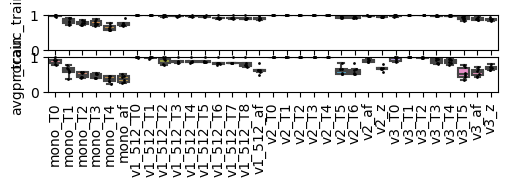

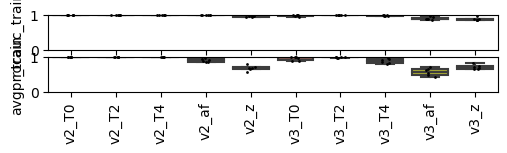

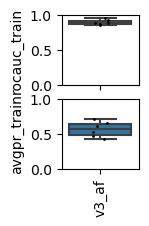

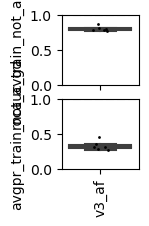

In [32]:
padj_classification_results_nw = pd.read_csv('07_23_ncip_classification_hold_2_default.csv')
padj_classification_results_nw['total_dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw['dataset2'] = padj_classification_results_nw['dataset']
holdout_combo_baselines = holdout_combo_baselines.rename(columns = {'test_AUCROC': 'rocauc_test', 'test_avgpr':'avgpr_test' })
padj_classification_results_nw['dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw = pd.concat([padj_classification_results_nw, af_holdout_baselines])
padj_classification_results_nw = padj_classification_results_nw.sort_values('dataset')
plot_df_classification_heldout_final(padj_classification_results_nw, 'classification_nw_1_ho.svg',5.8,1, 'rocauc_train', 'avgpr_train', test_23_max_aucroc, test_23_max_avgpr)
#paper figure 
keep_models_list = ['T0',  'T2',  'T4', 'af']
versions = ['v2', 'v3']
subset = padj_classification_results_nw[((padj_classification_results_nw.r2_cutoff.isin(keep_models_list)) & (padj_classification_results_nw.dataset2.isin(versions))) | (padj_classification_results_nw.l2_penalty.isna())]
#subset['dataset'] = subset.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)
plot_df_classification_heldout_final(subset, 'classification_nw_1_ho.svg',5.8,1, 'rocauc_train', 'avgpr_train', test_23_max_aucroc, test_23_max_avgpr)
plot_df_classification_heldout_final(subset[subset.dataset.isin(['v3', 'v3_af'])], 'train_af_v3_breakdown.svg',1,2, 'rocauc_train', 'avgpr_train', test_23_max_aucroc, test_23_max_avgpr)
plot_df_classification_heldout_final(subset[subset.dataset.isin(['v3', 'v3_af'])], 'train_af_v3_breakdown.svg',1,2, 'rocauc_train_not_avgd', 'avgpr_train_not_avgd', test_23_max_aucroc, test_23_max_avgpr)


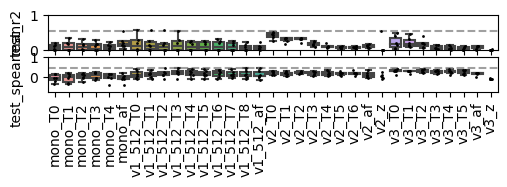

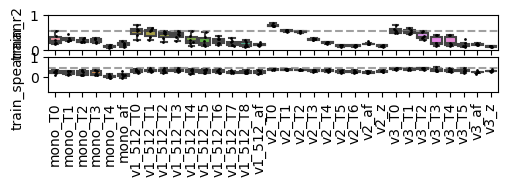

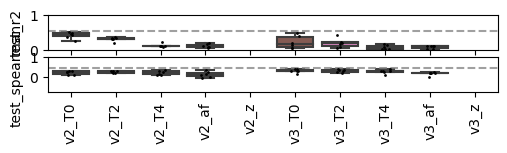

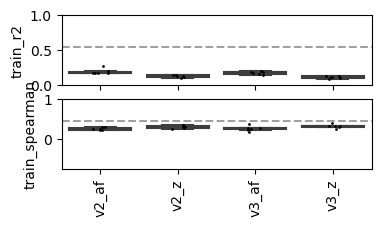

In [37]:
padj_classification_results_nw = pd.read_csv('07_23_ncip_regression_hold_2_default.csv')
padj_classification_results_nw['total_dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw['dataset2'] = padj_classification_results_nw['dataset']
#holdout_combo_baselines = holdout_combo_baselines.rename(columns = {'test_AUCROC': 'rocauc_test', 'test_avgpr':'avgpr_test' })
padj_classification_results_nw['dataset'] = padj_classification_results_nw['dataset'] + '_' + padj_classification_results_nw['r2_cutoff']
padj_classification_results_nw = pd.concat([padj_classification_results_nw, af_holdout_baselines])
padj_classification_results_nw = padj_classification_results_nw.sort_values('dataset')
plot_df_regression_heldout_final(padj_classification_results_nw, 'classification_nw_1_ho.svg',5.8,1,'test_r2', 'test_spearman', test_44_max_pr, test_44_max_sr)
#paper figure 
plot_df_regression_heldout_final(padj_classification_results_nw, 'classification_nw_1_ho.svg',5.8,1,'train_r2', 'train_spearman', test_44_max_pr, test_44_max_sr)
#paper figure 
keep_models_list = ['T0',  'T2',  'T4', 'af']
versions = ['v2', 'v3']
subset = padj_classification_results_nw[((padj_classification_results_nw.r2_cutoff.isin(keep_models_list)) & (padj_classification_results_nw.dataset2.isin(versions))) | (padj_classification_results_nw.l2_penalty.isna())]
#subset['dataset'] = subset.apply(lambda row: row['dataset2'] + ' (' + str(row['n_non_zero']) + ')', axis = 1)
plot_df_regression_heldout_final(subset, 'classification_nw_1_ho.svg',5.8,1, 'test_r2', 'test_spearman', test_44_max_pr, test_44_max_sr)
plot_df_regression_heldout_final(subset[subset.dataset.isin(['v2_z', 'v2_af', 'v3_z', 'v3_af'])], 'train_af_v3_breakdown.svg',4,2, 'train_r2', 'train_spearman', test_44_max_pr, test_44_max_sr)
#plot_df_regression_heldout_final(subset[subset.dataset.isin(['v3_z', 'v3_af'])], 'train_af_v3_breakdown.svg',1,2, 'train_r2_not_avgd', 'train_spearman_not_avgd', test_44_max_pr, test_44_max_sr)


In [34]:
subset[subset.dataset.isin(['v3_z', 'v3_af'])]

,dataset,test_pair,r2_cutoff,l2_penalty,train_r2_not_avgd,train_r2,train_spearman_not_avgd,train_spearman,test_r2_not_avgd,test_r2,test_spearman_not_avgd,test_spearman,n_non_zero,total_dataset,dataset2,mode,rocauc_train,rocauc_train_not_avgd,avgpr_train,avgpr_train_not_avgd
123,v3_af,P7|P8,af,0.015849,0.086725,0.181335,0.173102,0.246384,0.045068,0.104414,0.160969,0.218605,4.0,v3_af,v3,NaN,NaN,NaN,NaN,NaN
185,v3_af,P11|P12,af,0.100000,0.071435,0.149359,0.176514,0.268749,0.051723,0.111301,0.141002,0.178194,4.0,v3_af,v3,NaN,NaN,NaN,NaN,NaN
30,v3_af,P1|P2,af,0.063096,0.072008,0.171036,0.167845,0.256075,0.054432,0.092060,0.145893,0.195349,4.0,v3_af,v3,NaN,NaN,NaN,NaN,NaN
92,v3_af,P5|P6,af,0.006310,0.098618,0.176583,0.161046,0.225134,0.002044,0.004961,0.099803,0.160958,4.0,v3_af,v3,NaN,NaN,NaN,NaN,NaN
61,v3_af,P3|P4,af,0.063096,0.069249,0.140394,0.137769,0.175337,0.042735,0.109678,0.105738,0.181818,4.0,v3_af,v3,NaN,NaN,NaN,NaN,NaN
154,v3_af,P9|P10,af,0.063096,0.093302,0.188318,0.247653,0.362523,0.010701,0.028349,-0.032783,-0.011101,4.0,v3_af,v3,NaN,NaN,NaN,NaN,NaN
10,v3_z,NaN,z,NaN,0.060889,0.125388,0.311434,0.400609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,holdout,0.860112,0.798218,0.639600,0.382446
6,v3_z,NaN,z,NaN,0.045892,0.103257,0.231664,0.303126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,holdout,0.876437,0.808782,0.724372,0.394782
7,v3_z,NaN,z,NaN,0.034252,0.074251,0.188071,0.238633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,holdout,0.839655,0.797973,0.708871,0.379771
8,v3_z,NaN,z,NaN,0.059384,0.121440,0.239272,0.314260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,holdout,0.954598,0.863052,0.811071,0.419426
